In [1]:
from tensorflow.keras import datasets
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
# 데이터셋 로드하기
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# 데이터 분리
X_train, X_valid = train_images[:-5000], train_images[-5000:]
y_train, y_valid = train_labels[:-5000], train_labels[-5000:]


In [4]:
X_train = X_train/255.0
X_valid = X_valid/255.0
X_test = test_images/255.0


In [5]:
from functools import partial

# partial : 파라메터만 미리 정해준 또 다른 함수를 생성

DefaultConv2D = partial(tf.keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

# 이미지가 아주 크지 않아서 64개의 큰 필터 (7 x 7)와 스트라이드 1을 사용

model = tf.keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax'),
])


In [6]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 15s 7ms/step - loss: 0.7756 - accuracy: 0.7202 - val_loss: 0.4679 - val_accuracy: 0.8452
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4371 - accuracy: 0.8504 - val_loss: 0.3160 - val_accuracy: 0.8910
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3732 - accuracy: 0.8723 - val_loss: 0.3067 - val_accuracy: 0.8952
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3359 - accuracy: 0.8867 - val_loss: 0.3005 - val_accuracy: 0.8852
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3073 - accuracy: 0.8951 - val_loss: 0.2643 - val_accuracy: 0.9100
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2901 - accuracy: 0.9019 - val_loss: 0.2629 - val_accuracy: 0.9084
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2688 - accuracy: 0.9068 - val_loss: 0.2730 - val_ac

In [7]:
score = model.evaluate(X_test, test_labels)  # loss, accuracy
score

313/313 [==============================] - 1s 3ms/step - loss: 0.2767 - accuracy: 0.9117


[0.2767145037651062, 0.9117000102996826]

In [18]:
def plot_history():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('accuracy plot', color='white')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('loss plot', color='white')
    plt.legend()

    plt.show()


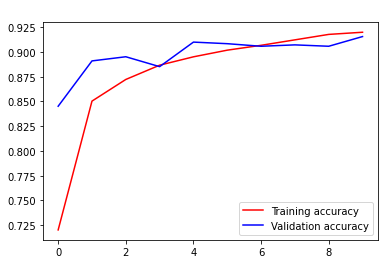

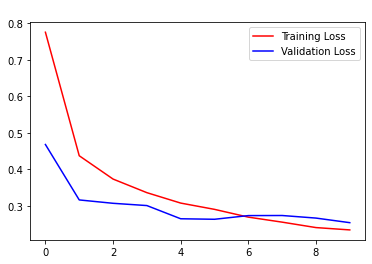

In [19]:
plot_history()